In [81]:
import base64
import requests, io
from PIL import Image
import matplotlib.pyplot as plt

# Background Graph

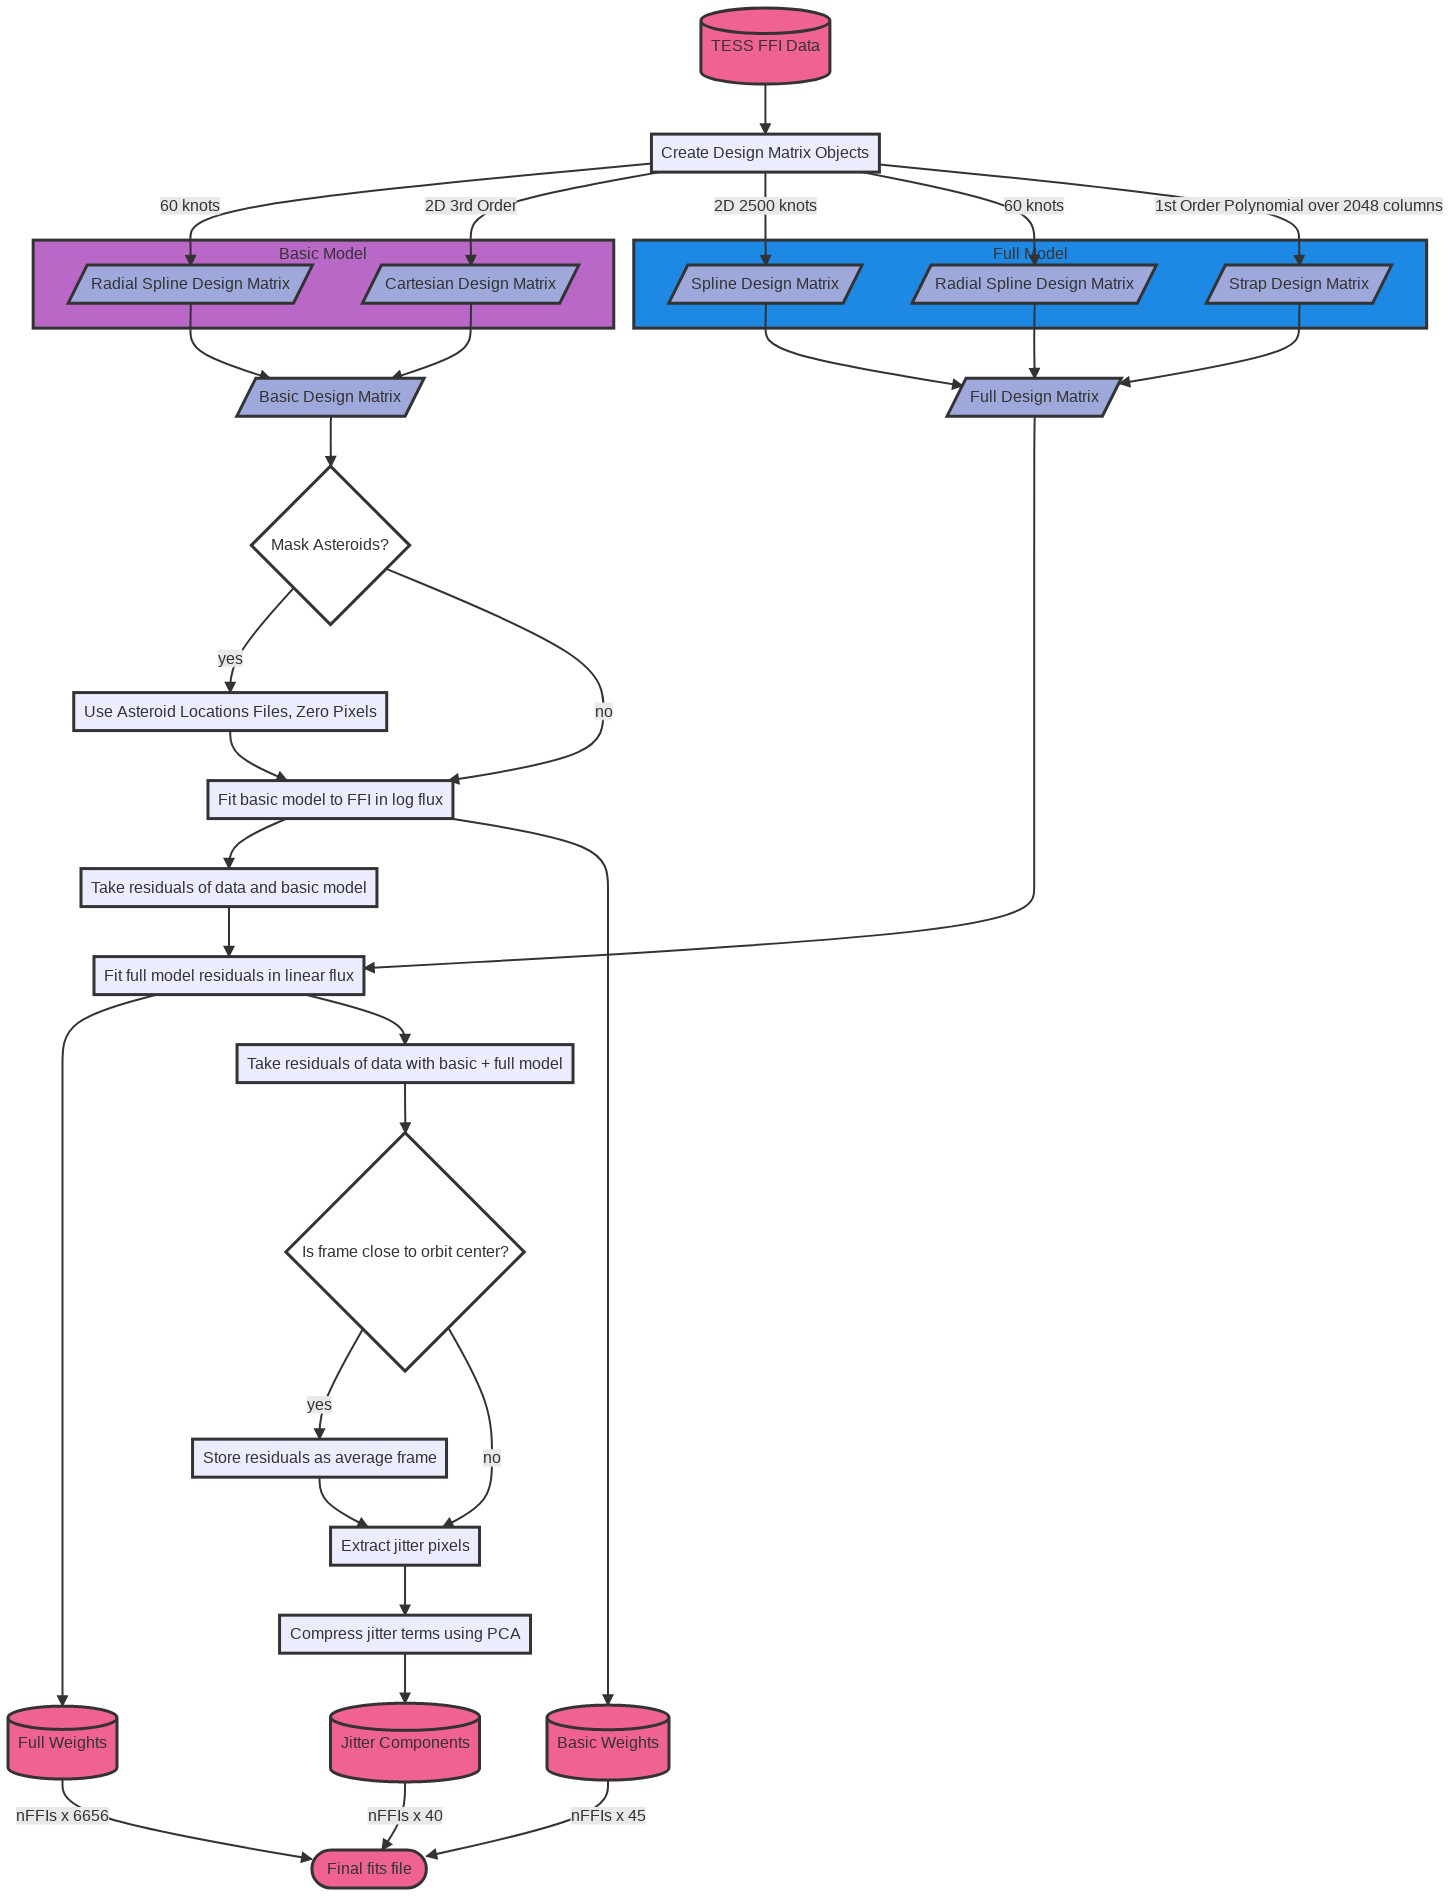

In [82]:
graph = """
graph TD;
    tessffi[(TESS FFI Data)] --> B[Create Design Matrix Objects];
    B -- 60 knots --> DM1;
    B -- 2D 3rd Order--> DM2;
    B -- 2D 2500 knots--> DM3;
    B -- 60 knots --> DM4;
    B -- 1st Order Polynomial over 2048 columns--> DM5;
    subgraph basicmodel[Basic Model]
        DM1[/Radial Spline Design Matrix/];
        DM2[/Cartesian Design Matrix/];
    end
    subgraph fullmodel[Full Model]
        DM3[/Spline Design Matrix/];
        DM4[/Radial Spline Design Matrix/];
        DM5[/Strap Design Matrix/];
    end
    DM1 --> DMB[/Basic Design Matrix/]
    DM2 --> DMB
    DM3 --> DMF[/Full Design Matrix/]
    DM4 --> DMF
    DM5 --> DMF
    DMB --> mask{Mask Asteroids?}
    mask -- yes --> mask2[Use Asteroid Locations Files, Zero Pixels]
    mask2 --> proc1
    mask -- no --> proc1[Fit basic model to FFI in log flux]
    proc1 --> resids1[Take residuals of data and basic model]
    resids1 --> proc2[Fit full model residuals in linear flux]
    DMF ----> proc2
    proc1 --> weights1[(Basic Weights)]
    proc2 --> weights2[(Full Weights)]
    proc2 --> resids2[Take residuals of data with basic + full model]
    resids2 --> test{Is frame close to orbit center?}
    test -- yes --> avg[Store residuals as average frame]
    test -- no --> extract[Extract jitter pixels]
    avg --> extract
    extract --> compress[Compress jitter terms using PCA]
    compress --> jitter[(Jitter Components)]
    jitter -- nFFIs x 40 --> fits([Final fits file])
    weights1 -- nFFIs x 45 --> fits
    weights2 -- nFFIs x 6656 --> fits

style tessffi fill:#f06292
style basicmodel fill:#ba68c8,stroke:#333,stroke-width:3px;
style fullmodel fill:#1e88e5,stroke:#333,stroke-width:3px;
style weights1 fill:#f06292
style weights2 fill:#f06292
style jitter fill:#f06292
style fits fill:#f06292
style test fill:white
style mask fill:white
style DM1 fill:#9FA8DA
style DM2 fill:#9FA8DA
style DM3 fill:#9FA8DA
style DM4 fill:#9FA8DA
style DM5 fill:#9FA8DA
style DMF fill:#9FA8DA
style DMB fill:#9FA8DA

classDef default stroke:#333,stroke-width:3px;
"""

graphbytes = graph.encode("ascii")
base64_bytes = base64.b64encode(graphbytes)
base64_string = base64_bytes.decode("ascii")
img = Image.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
img

In [83]:
%%capture --no-stderr cap
print(f"![](https://mermaid.ink/img/{base64_string})")

In [84]:
with open('flowchart1.md', 'w') as f:
    f.write(cap.stdout)

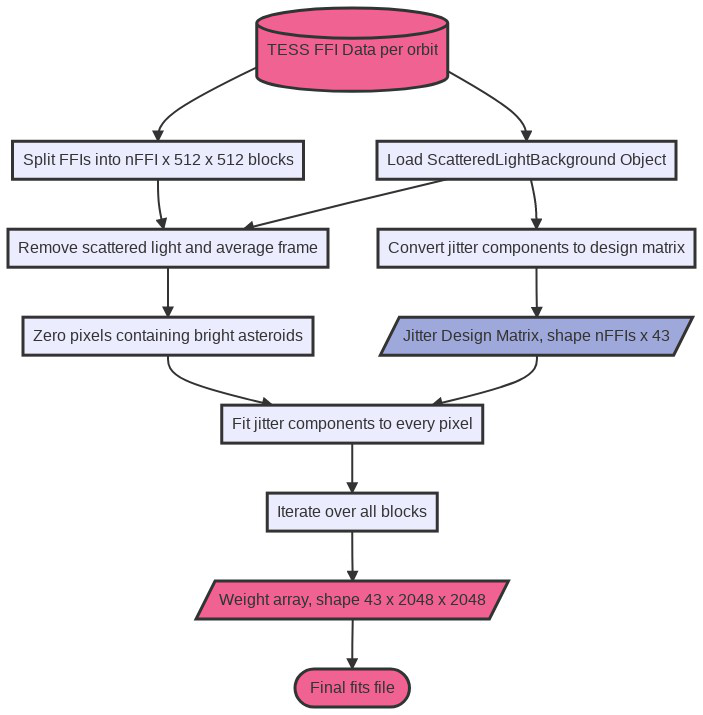

In [85]:
graph = """
graph TD;
    tessffi[(TESS FFI Data per orbit)] --> A[Load ScatteredLightBackground Object];
    A --> C[Convert jitter components to design matrix]
    C --> DM[/Jitter Design Matrix, shape nFFIs x 43/]
    tessffi --> B[Split FFIs into nFFI x 512 x 512 blocks]
    B --> resids[Remove scattered light and average frame]
    A --> resids
    resids --> mask[Zero pixels containing bright asteroids]
    mask --> proc1[Fit jitter components to every pixel]
    DM --> proc1
    proc1 --> proc2[Iterate over all blocks]
    proc2 --> weights[/Weight array, shape 43 x 2048 x 2048/]
    weights --> fits([Final fits file])
    
    
style tessffi fill:#f06292
style DM fill:#9FA8DA
style weights fill:#f06292
style fits fill:#f06292
classDef default stroke:#333,stroke-width:3px;
"""

graphbytes = graph.encode("ascii")
base64_bytes = base64.b64encode(graphbytes)
base64_string = base64_bytes.decode("ascii")
img = Image.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
img

In [86]:
%%capture --no-stderr cap
print(f"![](https://mermaid.ink/img/{base64_string})")

In [87]:
with open('flowchart2.md', 'w') as f:
    f.write(cap.stdout)